In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../figures")

from what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [4]:
from main import init
args = init(filename='../data/2019-06-12') # pas de drop out!
args.what_offset_std = 0
args.what_offset_max = 25
args.contrast = None
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 1.0,
 'contrast': None,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'what_offset_std': 0,
 'what_offset_max': 25}

## Unit tests

In [5]:
i_offset = None
j_offset = None

In [6]:
transform=transforms.Compose([
                               WhatShift(args,i_offset=i_offset, j_offset=j_offset),
                               WhatBackground(contrast = args.contrast,
                                              noise=args.noise, 
                                              sf_0=args.sf_0, 
                                              B_sf=args.B_sf),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [7]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [8]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [9]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [10]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [11]:
data, label = next(iter(train_loader))

In [12]:
label.shape

torch.Size([100])

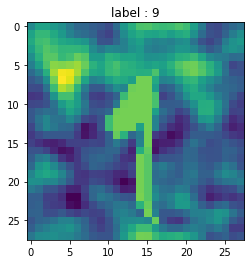

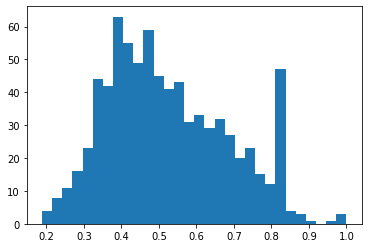

In [13]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))
plt.show()
h = plt.hist(data[i,:,:].detach().numpy().flatten(), 30)

In [14]:
device = 'cpu'
model = WhatNet().to(device)
loss_func = F.nll_loss
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

### Script d'entraînement de what_model

In [19]:
import sys, os
import datetime

In [20]:
std_max = 15

In [31]:
suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std_max)
what_model_path = "../data/MNIST_cnn_{}.pt".format(suffix)

if not os.path.isfile(what_model_path):

    debut = datetime.datetime.now()
    date = str(debut)  
    
    args.epochs = 5  # 10 plus tard
    args.save_model = True    
    args.what_offset_max = 25
    args.do_adam = True #'adam'
    
    seed = 0
    for std in range(std_max+1):
        print("En cours : std = " + str(std) + "\n")
        args.what_offset_std = std
        what_model = what.model
        what = What(args, model=what_model, force=True, seed=seed)
        seed += 1
        print("\n")

    torch.save(what_model, what_model_path)

    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : " + str(fin - debut))
else:
    what_model = torch.load(what_model_path)
    what = What(args, model=what_model)



En cours : std = 0

Training the What model
Train Epoch: 1/5 [0/60000 (0%)]	Loss: 0.619433
Train Epoch: 1/5 [10000/60000 (17%)]	Loss: 0.381339
Train Epoch: 1/5 [20000/60000 (33%)]	Loss: 0.564936
Train Epoch: 1/5 [30000/60000 (50%)]	Loss: 0.406193
Train Epoch: 1/5 [40000/60000 (67%)]	Loss: 0.214297
Train Epoch: 1/5 [50000/60000 (83%)]	Loss: 0.234865

Test set: Average loss: 0.0028, Accuracy: 9134/10000 (91%)

Train Epoch: 2/5 [0/60000 (0%)]	Loss: 0.282950
Train Epoch: 2/5 [10000/60000 (17%)]	Loss: 0.200974
Train Epoch: 2/5 [20000/60000 (33%)]	Loss: 0.257482
Train Epoch: 2/5 [30000/60000 (50%)]	Loss: 0.214048
Train Epoch: 2/5 [40000/60000 (67%)]	Loss: 0.550301
Train Epoch: 2/5 [50000/60000 (83%)]	Loss: 0.295753

Test set: Average loss: 0.0026, Accuracy: 9203/10000 (92%)

Train Epoch: 3/5 [0/60000 (0%)]	Loss: 0.243362
Train Epoch: 3/5 [10000/60000 (17%)]	Loss: 0.280988
Train Epoch: 3/5 [20000/60000 (33%)]	Loss: 0.227574
Train Epoch: 3/5 [30000/60000 (50%)]	Loss: 0.344100
Train Epoch: 3/5 

Train Epoch: 2/5 [20000/60000 (33%)]	Loss: 0.537777
Train Epoch: 2/5 [30000/60000 (50%)]	Loss: 0.559570
Train Epoch: 2/5 [40000/60000 (67%)]	Loss: 0.682554
Train Epoch: 2/5 [50000/60000 (83%)]	Loss: 0.748502

Test set: Average loss: 0.0057, Accuracy: 8179/10000 (82%)

Train Epoch: 3/5 [0/60000 (0%)]	Loss: 0.676433
Train Epoch: 3/5 [10000/60000 (17%)]	Loss: 0.463492
Train Epoch: 3/5 [20000/60000 (33%)]	Loss: 0.661109
Train Epoch: 3/5 [30000/60000 (50%)]	Loss: 0.637852
Train Epoch: 3/5 [40000/60000 (67%)]	Loss: 0.434014
Train Epoch: 3/5 [50000/60000 (83%)]	Loss: 0.382277

Test set: Average loss: 0.0062, Accuracy: 8028/10000 (80%)

Train Epoch: 4/5 [0/60000 (0%)]	Loss: 0.508236
Train Epoch: 4/5 [10000/60000 (17%)]	Loss: 0.482197
Train Epoch: 4/5 [20000/60000 (33%)]	Loss: 0.450577
Train Epoch: 4/5 [30000/60000 (50%)]	Loss: 0.542299
Train Epoch: 4/5 [40000/60000 (67%)]	Loss: 0.639929
Train Epoch: 4/5 [50000/60000 (83%)]	Loss: 0.477086

Test set: Average loss: 0.0066, Accuracy: 7939/10000 (7

Train Epoch: 3/5 [50000/60000 (83%)]	Loss: 0.776488

Test set: Average loss: 0.0121, Accuracy: 5891/10000 (59%)

Train Epoch: 4/5 [0/60000 (0%)]	Loss: 1.221649
Train Epoch: 4/5 [10000/60000 (17%)]	Loss: 1.085753
Train Epoch: 4/5 [20000/60000 (33%)]	Loss: 1.035958
Train Epoch: 4/5 [30000/60000 (50%)]	Loss: 1.024786
Train Epoch: 4/5 [40000/60000 (67%)]	Loss: 1.081265
Train Epoch: 4/5 [50000/60000 (83%)]	Loss: 1.031641

Test set: Average loss: 0.0117, Accuracy: 5961/10000 (60%)

Train Epoch: 5/5 [0/60000 (0%)]	Loss: 1.008255
Train Epoch: 5/5 [10000/60000 (17%)]	Loss: 1.052898
Train Epoch: 5/5 [20000/60000 (33%)]	Loss: 1.024505
Train Epoch: 5/5 [30000/60000 (50%)]	Loss: 1.078439
Train Epoch: 5/5 [40000/60000 (67%)]	Loss: 1.227739
Train Epoch: 5/5 [50000/60000 (83%)]	Loss: 1.267537

Test set: Average loss: 0.0121, Accuracy: 5871/10000 (59%)

../data/MNIST_cnn_0.1_0.1_1.0_None_8.pt


En cours : std = 9

Training the What model
Train Epoch: 1/5 [0/60000 (0%)]	Loss: 1.415508
Train Epoch: 1/5 [

Train Epoch: 5/5 [10000/60000 (17%)]	Loss: 1.386885
Train Epoch: 5/5 [20000/60000 (33%)]	Loss: 1.558897
Train Epoch: 5/5 [30000/60000 (50%)]	Loss: 1.316144
Train Epoch: 5/5 [40000/60000 (67%)]	Loss: 1.571039
Train Epoch: 5/5 [50000/60000 (83%)]	Loss: 1.443762

Test set: Average loss: 0.0164, Accuracy: 4076/10000 (41%)

../data/MNIST_cnn_0.1_0.1_1.0_None_12.pt


En cours : std = 13

Training the What model
Train Epoch: 1/5 [0/60000 (0%)]	Loss: 1.570230
Train Epoch: 1/5 [10000/60000 (17%)]	Loss: 1.731643
Train Epoch: 1/5 [20000/60000 (33%)]	Loss: 1.784244
Train Epoch: 1/5 [30000/60000 (50%)]	Loss: 1.630866
Train Epoch: 1/5 [40000/60000 (67%)]	Loss: 1.641684
Train Epoch: 1/5 [50000/60000 (83%)]	Loss: 1.733833

Test set: Average loss: 0.0169, Accuracy: 3862/10000 (39%)

Train Epoch: 2/5 [0/60000 (0%)]	Loss: 1.798005
Train Epoch: 2/5 [10000/60000 (17%)]	Loss: 1.499866
Train Epoch: 2/5 [20000/60000 (33%)]	Loss: 1.589043
Train Epoch: 2/5 [30000/60000 (50%)]	Loss: 1.779945
Train Epoch: 2/5 [40

### General accuracy

In [32]:
acc = what.trainer.test()


Test set: Average loss: 0.0181, Accuracy: 3450/10000 (34%)



### Central accuracy

In [33]:
args.what_offset_std = 0
what = What(args, model=what_model)
acc = what.trainer.test()


Test set: Average loss: 0.0063, Accuracy: 8389/10000 (84%)



## Accuracy map calculation

In [38]:
map_path = "../data/MNIST_accuracy_{}.npy".format(suffix)

if not os.path.isfile(map_path):
    acc_map = np.zeros((55, 55))
    seed = 0
    for i_offset in range(-27,28):
        for j_offset in range(-27,28):
            transform=transforms.Compose([
                                   WhatShift(args, i_offset=i_offset, j_offset=j_offset),
                                   WhatBackground(contrast = args.contrast,
                                                  noise=args.noise, 
                                                  sf_0=args.sf_0, 
                                                  B_sf=args.B_sf,
                                                  seed = seed),
                                   transforms.ToTensor(),
                                   #transforms.Normalize((args.mean,), (args.std,))
                               ])
            dataset_test = MNIST('../data',
                            train=False,
                            download=True,
                            transform=transform,
                            )
            test_loader = torch.utils.data.DataLoader(dataset_test,
                                             batch_size=args.minibatch_size,
                                             shuffle=True)
            whatTrainer = WhatTrainer(args, model = what_model, test_loader = test_loader, seed = seed)
            acc = whatTrainer.test()
            print(i_offset, j_offset, acc)
            acc_map[i_offset + 27, j_offset + 27] = acc
            seed += 1
    np.save(map_path, acc_map)        
else:
    acc_map = np.load(map_path)


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -27 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-27 -26 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-27 -25 0.1135

Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

-27 -24 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-27 -23 0.1135

Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

-27 -22 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-27 -21 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -20 0.1135

Test set: Average loss: 0.0281, Accuracy: 1020/10000 (10%)

-27 -19 0.102

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-27 -18 0.1135

Test set: Average loss: 0.0232, Accuracy: 1136/10000 (11%)

-27 -17 0.1136

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-27 -16 0.1135

Test set: Average loss: 0.0232, Accuracy: 1135/10000 (11%)

-27 -15 0.1135

Test set: Av


Test set: Average loss: 0.0232, Accuracy: 958/10000 (10%)

-25 -27 0.0958

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-25 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-25 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-25 -24 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-25 -23 0.1135

Test set: Average loss: 0.0232, Accuracy: 1135/10000 (11%)

-25 -22 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-25 -21 0.1135

Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

-25 -20 0.1135

Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

-25 -19 0.1135

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-25 -18 0.1136

Test set: Average loss: 0.0231, Accuracy: 1137/10000 (11%)

-25 -17 0.1137

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-25 -16 0.1138

Test set: Average loss: 0.0230, Accuracy: 1143/10000 (11%)

-25 -15 0.1143

Test set: Av


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-23 -27 0.1135

Test set: Average loss: 0.0239, Accuracy: 1135/10000 (11%)

-23 -26 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-23 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-23 -24 0.1135

Test set: Average loss: 0.0230, Accuracy: 1134/10000 (11%)

-23 -23 0.1134

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-23 -22 0.1138

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-23 -21 0.1135

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-23 -20 0.1138

Test set: Average loss: 0.0231, Accuracy: 1145/10000 (11%)

-23 -19 0.1145

Test set: Average loss: 0.0231, Accuracy: 1146/10000 (11%)

-23 -18 0.1146

Test set: Average loss: 0.0231, Accuracy: 1147/10000 (11%)

-23 -17 0.1147

Test set: Average loss: 0.0231, Accuracy: 1142/10000 (11%)

-23 -16 0.1142

Test set: Average loss: 0.0231, Accuracy: 1159/10000 (12%)

-23 -15 0.1159

Test set: A


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-21 -27 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-21 -26 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-21 -25 0.1135

Test set: Average loss: 0.0232, Accuracy: 1135/10000 (11%)

-21 -24 0.1135

Test set: Average loss: 0.0232, Accuracy: 1139/10000 (11%)

-21 -23 0.1139

Test set: Average loss: 0.0231, Accuracy: 1140/10000 (11%)

-21 -22 0.114

Test set: Average loss: 0.0237, Accuracy: 864/10000 (9%)

-21 -21 0.0864

Test set: Average loss: 0.0233, Accuracy: 893/10000 (9%)

-21 -20 0.0893

Test set: Average loss: 0.0230, Accuracy: 1157/10000 (12%)

-21 -19 0.1157

Test set: Average loss: 0.0231, Accuracy: 1180/10000 (12%)

-21 -18 0.118

Test set: Average loss: 0.0231, Accuracy: 1199/10000 (12%)

-21 -17 0.1199

Test set: Average loss: 0.0232, Accuracy: 470/10000 (5%)

-21 -16 0.047

Test set: Average loss: 0.0230, Accuracy: 1243/10000 (12%)

-21 -15 0.1243

Test set: Average lo


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-19 -27 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-19 -26 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-19 -25 0.1135

Test set: Average loss: 0.0230, Accuracy: 1137/10000 (11%)

-19 -24 0.1137

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-19 -23 0.1136

Test set: Average loss: 0.0231, Accuracy: 1152/10000 (12%)

-19 -22 0.1152

Test set: Average loss: 0.0231, Accuracy: 1157/10000 (12%)

-19 -21 0.1157

Test set: Average loss: 0.0231, Accuracy: 1169/10000 (12%)

-19 -20 0.1169

Test set: Average loss: 0.0231, Accuracy: 1201/10000 (12%)

-19 -19 0.1201

Test set: Average loss: 0.0231, Accuracy: 1218/10000 (12%)

-19 -18 0.1218

Test set: Average loss: 0.0232, Accuracy: 873/10000 (9%)

-19 -17 0.0873

Test set: Average loss: 0.0226, Accuracy: 1347/10000 (13%)

-19 -16 0.1347

Test set: Average loss: 0.0227, Accuracy: 1442/10000 (14%)

-19 -15 0.1442

Test set: Ave


Test set: Average loss: 0.0233, Accuracy: 1135/10000 (11%)

-17 -27 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-17 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1134/10000 (11%)

-17 -25 0.1134

Test set: Average loss: 0.0230, Accuracy: 1136/10000 (11%)

-17 -24 0.1136

Test set: Average loss: 0.0231, Accuracy: 1139/10000 (11%)

-17 -23 0.1139

Test set: Average loss: 0.0231, Accuracy: 1152/10000 (12%)

-17 -22 0.1152

Test set: Average loss: 0.0231, Accuracy: 1175/10000 (12%)

-17 -21 0.1175

Test set: Average loss: 0.0230, Accuracy: 1209/10000 (12%)

-17 -20 0.1209

Test set: Average loss: 0.0231, Accuracy: 1227/10000 (12%)

-17 -19 0.1227

Test set: Average loss: 0.0230, Accuracy: 1250/10000 (12%)

-17 -18 0.125

Test set: Average loss: 0.0230, Accuracy: 1356/10000 (14%)

-17 -17 0.1356

Test set: Average loss: 0.0230, Accuracy: 1404/10000 (14%)

-17 -16 0.1404

Test set: Average loss: 0.0225, Accuracy: 1551/10000 (16%)

-17 -15 0.1551

Test set: Av


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-15 -27 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-15 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1134/10000 (11%)

-15 -25 0.1134

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-15 -24 0.1138

Test set: Average loss: 0.0231, Accuracy: 1143/10000 (11%)

-15 -23 0.1143

Test set: Average loss: 0.0237, Accuracy: 1157/10000 (12%)

-15 -22 0.1157

Test set: Average loss: 0.0230, Accuracy: 1179/10000 (12%)

-15 -21 0.1179

Test set: Average loss: 0.0231, Accuracy: 1195/10000 (12%)

-15 -20 0.1195

Test set: Average loss: 0.0231, Accuracy: 1250/10000 (12%)

-15 -19 0.125

Test set: Average loss: 0.0232, Accuracy: 1307/10000 (13%)

-15 -18 0.1307

Test set: Average loss: 0.0233, Accuracy: 1358/10000 (14%)

-15 -17 0.1358

Test set: Average loss: 0.0230, Accuracy: 1514/10000 (15%)

-15 -16 0.1514

Test set: Average loss: 0.0226, Accuracy: 1623/10000 (16%)

-15 -15 0.1623

Test set: Av


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-13 -27 0.1135

Test set: Average loss: 0.0230, Accuracy: 1136/10000 (11%)

-13 -26 0.1136

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-13 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1137/10000 (11%)

-13 -24 0.1137

Test set: Average loss: 0.0231, Accuracy: 1151/10000 (12%)

-13 -23 0.1151

Test set: Average loss: 0.0230, Accuracy: 1164/10000 (12%)

-13 -22 0.1164

Test set: Average loss: 0.0231, Accuracy: 1175/10000 (12%)

-13 -21 0.1175

Test set: Average loss: 0.0231, Accuracy: 1230/10000 (12%)

-13 -20 0.123

Test set: Average loss: 0.0234, Accuracy: 1284/10000 (13%)

-13 -19 0.1284

Test set: Average loss: 0.0233, Accuracy: 1343/10000 (13%)

-13 -18 0.1343

Test set: Average loss: 0.0235, Accuracy: 1421/10000 (14%)

-13 -17 0.1421

Test set: Average loss: 0.0232, Accuracy: 1598/10000 (16%)

-13 -16 0.1598

Test set: Average loss: 0.0225, Accuracy: 1819/10000 (18%)

-13 -15 0.1819

Test set: Av


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-11 -27 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-11 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-11 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1136/10000 (11%)

-11 -24 0.1136

Test set: Average loss: 0.0231, Accuracy: 1145/10000 (11%)

-11 -23 0.1145

Test set: Average loss: 0.0231, Accuracy: 1171/10000 (12%)

-11 -22 0.1171

Test set: Average loss: 0.0231, Accuracy: 1205/10000 (12%)

-11 -21 0.1205

Test set: Average loss: 0.0233, Accuracy: 1252/10000 (13%)

-11 -20 0.1252

Test set: Average loss: 0.0230, Accuracy: 1332/10000 (13%)

-11 -19 0.1332

Test set: Average loss: 0.0234, Accuracy: 1430/10000 (14%)

-11 -18 0.143

Test set: Average loss: 0.0232, Accuracy: 1619/10000 (16%)

-11 -17 0.1619

Test set: Average loss: 0.0227, Accuracy: 1794/10000 (18%)

-11 -16 0.1794

Test set: Average loss: 0.0217, Accuracy: 2185/10000 (22%)

-11 -15 0.2185

Test set: Av


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

-9 -27 0.1135

Test set: Average loss: 0.0232, Accuracy: 1135/10000 (11%)

-9 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-9 -25 0.1135

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-9 -24 0.1138

Test set: Average loss: 0.0231, Accuracy: 1154/10000 (12%)

-9 -23 0.1154

Test set: Average loss: 0.0231, Accuracy: 1173/10000 (12%)

-9 -22 0.1173

Test set: Average loss: 0.0231, Accuracy: 1213/10000 (12%)

-9 -21 0.1213

Test set: Average loss: 0.0232, Accuracy: 1288/10000 (13%)

-9 -20 0.1288

Test set: Average loss: 0.0233, Accuracy: 1376/10000 (14%)

-9 -19 0.1376

Test set: Average loss: 0.0232, Accuracy: 1531/10000 (15%)

-9 -18 0.1531

Test set: Average loss: 0.0221, Accuracy: 1783/10000 (18%)

-9 -17 0.1783

Test set: Average loss: 0.0220, Accuracy: 2073/10000 (21%)

-9 -16 0.2073

Test set: Average loss: 0.0209, Accuracy: 2557/10000 (26%)

-9 -15 0.2557

Test set: Average loss: 


Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

-7 -26 0.1135

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

-7 -25 0.1138

Test set: Average loss: 0.0231, Accuracy: 1141/10000 (11%)

-7 -24 0.1141

Test set: Average loss: 0.0231, Accuracy: 1159/10000 (12%)

-7 -23 0.1159

Test set: Average loss: 0.0230, Accuracy: 1181/10000 (12%)

-7 -22 0.1181

Test set: Average loss: 0.0232, Accuracy: 1225/10000 (12%)

-7 -21 0.1225

Test set: Average loss: 0.0231, Accuracy: 1348/10000 (13%)

-7 -20 0.1348

Test set: Average loss: 0.0232, Accuracy: 1422/10000 (14%)

-7 -19 0.1422

Test set: Average loss: 0.0229, Accuracy: 1659/10000 (17%)

-7 -18 0.1659

Test set: Average loss: 0.0224, Accuracy: 1909/10000 (19%)

-7 -17 0.1909

Test set: Average loss: 0.0217, Accuracy: 2308/10000 (23%)

-7 -16 0.2308

Test set: Average loss: 0.0203, Accuracy: 2840/10000 (28%)

-7 -15 0.284

Test set: Average loss: 0.0190, Accuracy: 3338/10000 (33%)

-7 -14 0.3338

Test set: Average loss: 0


Test set: Average loss: 0.0231, Accuracy: 1137/10000 (11%)

-5 -25 0.1137

Test set: Average loss: 0.0231, Accuracy: 1142/10000 (11%)

-5 -24 0.1142

Test set: Average loss: 0.0230, Accuracy: 1167/10000 (12%)

-5 -23 0.1167

Test set: Average loss: 0.0232, Accuracy: 1205/10000 (12%)

-5 -22 0.1205

Test set: Average loss: 0.0230, Accuracy: 1288/10000 (13%)

-5 -21 0.1288

Test set: Average loss: 0.0232, Accuracy: 1388/10000 (14%)

-5 -20 0.1388

Test set: Average loss: 0.0227, Accuracy: 1527/10000 (15%)

-5 -19 0.1527

Test set: Average loss: 0.0226, Accuracy: 1801/10000 (18%)

-5 -18 0.1801

Test set: Average loss: 0.0221, Accuracy: 2157/10000 (22%)

-5 -17 0.2157

Test set: Average loss: 0.0211, Accuracy: 2642/10000 (26%)

-5 -16 0.2642

Test set: Average loss: 0.0199, Accuracy: 3157/10000 (32%)

-5 -15 0.3157

Test set: Average loss: 0.0183, Accuracy: 3725/10000 (37%)

-5 -14 0.3725

Test set: Average loss: 0.0170, Accuracy: 4077/10000 (41%)

-5 -13 0.4077

Test set: Average loss: 


Test set: Average loss: 0.0231, Accuracy: 1146/10000 (11%)

-3 -24 0.1146

Test set: Average loss: 0.0231, Accuracy: 1171/10000 (12%)

-3 -23 0.1171

Test set: Average loss: 0.0231, Accuracy: 1218/10000 (12%)

-3 -22 0.1218

Test set: Average loss: 0.0231, Accuracy: 1323/10000 (13%)

-3 -21 0.1323

Test set: Average loss: 0.0230, Accuracy: 1445/10000 (14%)

-3 -20 0.1445

Test set: Average loss: 0.0229, Accuracy: 1713/10000 (17%)

-3 -19 0.1713

Test set: Average loss: 0.0224, Accuracy: 1977/10000 (20%)

-3 -18 0.1977

Test set: Average loss: 0.0215, Accuracy: 2458/10000 (25%)

-3 -17 0.2458

Test set: Average loss: 0.0207, Accuracy: 2917/10000 (29%)

-3 -16 0.2917

Test set: Average loss: 0.0192, Accuracy: 3560/10000 (36%)

-3 -15 0.356

Test set: Average loss: 0.0179, Accuracy: 3905/10000 (39%)

-3 -14 0.3905

Test set: Average loss: 0.0166, Accuracy: 4245/10000 (42%)

-3 -13 0.4245

Test set: Average loss: 0.0156, Accuracy: 4622/10000 (46%)

-3 -12 0.4622

Test set: Average loss: 0


Test set: Average loss: 0.0230, Accuracy: 1171/10000 (12%)

-1 -23 0.1171

Test set: Average loss: 0.0230, Accuracy: 1228/10000 (12%)

-1 -22 0.1228

Test set: Average loss: 0.0229, Accuracy: 1368/10000 (14%)

-1 -21 0.1368

Test set: Average loss: 0.0228, Accuracy: 1507/10000 (15%)

-1 -20 0.1507

Test set: Average loss: 0.0225, Accuracy: 1849/10000 (18%)

-1 -19 0.1849

Test set: Average loss: 0.0220, Accuracy: 2197/10000 (22%)

-1 -18 0.2197

Test set: Average loss: 0.0211, Accuracy: 2747/10000 (27%)

-1 -17 0.2747

Test set: Average loss: 0.0199, Accuracy: 3292/10000 (33%)

-1 -16 0.3292

Test set: Average loss: 0.0185, Accuracy: 3856/10000 (39%)

-1 -15 0.3856

Test set: Average loss: 0.0169, Accuracy: 4359/10000 (44%)

-1 -14 0.4359

Test set: Average loss: 0.0161, Accuracy: 4650/10000 (46%)

-1 -13 0.465

Test set: Average loss: 0.0150, Accuracy: 5034/10000 (50%)

-1 -12 0.5034

Test set: Average loss: 0.0142, Accuracy: 5395/10000 (54%)

-1 -11 0.5395

Test set: Average loss: 0


Test set: Average loss: 0.0225, Accuracy: 1401/10000 (14%)

1 -21 0.1401

Test set: Average loss: 0.0227, Accuracy: 1598/10000 (16%)

1 -20 0.1598

Test set: Average loss: 0.0224, Accuracy: 1837/10000 (18%)

1 -19 0.1837

Test set: Average loss: 0.0220, Accuracy: 1682/10000 (17%)

1 -18 0.1682

Test set: Average loss: 0.0212, Accuracy: 2707/10000 (27%)

1 -17 0.2707

Test set: Average loss: 0.0203, Accuracy: 3270/10000 (33%)

1 -16 0.327

Test set: Average loss: 0.0188, Accuracy: 3789/10000 (38%)

1 -15 0.3789

Test set: Average loss: 0.0177, Accuracy: 4144/10000 (41%)

1 -14 0.4144

Test set: Average loss: 0.0166, Accuracy: 4522/10000 (45%)

1 -13 0.4522

Test set: Average loss: 0.0155, Accuracy: 4843/10000 (48%)

1 -12 0.4843

Test set: Average loss: 0.0148, Accuracy: 5268/10000 (53%)

1 -11 0.5268

Test set: Average loss: 0.0139, Accuracy: 5707/10000 (57%)

1 -10 0.5707

Test set: Average loss: 0.0123, Accuracy: 6262/10000 (63%)

1 -9 0.6262

Test set: Average loss: 0.0107, Accurac


Test set: Average loss: 0.0222, Accuracy: 2121/10000 (21%)

3 -18 0.2121

Test set: Average loss: 0.0216, Accuracy: 2518/10000 (25%)

3 -17 0.2518

Test set: Average loss: 0.0208, Accuracy: 2953/10000 (30%)

3 -16 0.2953

Test set: Average loss: 0.0200, Accuracy: 3335/10000 (33%)

3 -15 0.3335

Test set: Average loss: 0.0184, Accuracy: 3891/10000 (39%)

3 -14 0.3891

Test set: Average loss: 0.0172, Accuracy: 4253/10000 (43%)

3 -13 0.4253

Test set: Average loss: 0.0160, Accuracy: 4732/10000 (47%)

3 -12 0.4732

Test set: Average loss: 0.0152, Accuracy: 5173/10000 (52%)

3 -11 0.5173

Test set: Average loss: 0.0144, Accuracy: 5530/10000 (55%)

3 -10 0.553

Test set: Average loss: 0.0135, Accuracy: 5926/10000 (59%)

3 -9 0.5926

Test set: Average loss: 0.0121, Accuracy: 6425/10000 (64%)

3 -8 0.6425

Test set: Average loss: 0.0111, Accuracy: 6851/10000 (69%)

3 -7 0.6851

Test set: Average loss: 0.0095, Accuracy: 7273/10000 (73%)

3 -6 0.7273

Test set: Average loss: 0.0087, Accuracy: 


Test set: Average loss: 0.0206, Accuracy: 3087/10000 (31%)

5 -15 0.3087

Test set: Average loss: 0.0194, Accuracy: 3439/10000 (34%)

5 -14 0.3439

Test set: Average loss: 0.0182, Accuracy: 3823/10000 (38%)

5 -13 0.3823

Test set: Average loss: 0.0171, Accuracy: 4244/10000 (42%)

5 -12 0.4244

Test set: Average loss: 0.0159, Accuracy: 4718/10000 (47%)

5 -11 0.4718

Test set: Average loss: 0.0153, Accuracy: 5057/10000 (51%)

5 -10 0.5057

Test set: Average loss: 0.0143, Accuracy: 5518/10000 (55%)

5 -9 0.5518

Test set: Average loss: 0.0132, Accuracy: 5941/10000 (59%)

5 -8 0.5941

Test set: Average loss: 0.0119, Accuracy: 6420/10000 (64%)

5 -7 0.642

Test set: Average loss: 0.0110, Accuracy: 6796/10000 (68%)

5 -6 0.6796

Test set: Average loss: 0.0104, Accuracy: 6979/10000 (70%)

5 -5 0.6979

Test set: Average loss: 0.0096, Accuracy: 7230/10000 (72%)

5 -4 0.723

Test set: Average loss: 0.0090, Accuracy: 7469/10000 (75%)

5 -3 0.7469

Test set: Average loss: 0.0090, Accuracy: 7460


Test set: Average loss: 0.0184, Accuracy: 3673/10000 (37%)

7 -12 0.3673

Test set: Average loss: 0.0173, Accuracy: 4144/10000 (41%)

7 -11 0.4144

Test set: Average loss: 0.0161, Accuracy: 4648/10000 (46%)

7 -10 0.4648

Test set: Average loss: 0.0152, Accuracy: 5193/10000 (52%)

7 -9 0.5193

Test set: Average loss: 0.0136, Accuracy: 5650/10000 (56%)

7 -8 0.565

Test set: Average loss: 0.0131, Accuracy: 5889/10000 (59%)

7 -7 0.5889

Test set: Average loss: 0.0123, Accuracy: 6175/10000 (62%)

7 -6 0.6175

Test set: Average loss: 0.0118, Accuracy: 6445/10000 (64%)

7 -5 0.6445

Test set: Average loss: 0.0113, Accuracy: 6630/10000 (66%)

7 -4 0.663

Test set: Average loss: 0.0106, Accuracy: 6778/10000 (68%)

7 -3 0.6778

Test set: Average loss: 0.0100, Accuracy: 6939/10000 (69%)

7 -2 0.6939

Test set: Average loss: 0.0099, Accuracy: 6998/10000 (70%)

7 -1 0.6998

Test set: Average loss: 0.0099, Accuracy: 6937/10000 (69%)

7 0 0.6937

Test set: Average loss: 0.0101, Accuracy: 6915/100


Test set: Average loss: 0.0160, Accuracy: 4501/10000 (45%)

9 -9 0.4501

Test set: Average loss: 0.0153, Accuracy: 4877/10000 (49%)

9 -8 0.4877

Test set: Average loss: 0.0144, Accuracy: 5211/10000 (52%)

9 -7 0.5211

Test set: Average loss: 0.0136, Accuracy: 5543/10000 (55%)

9 -6 0.5543

Test set: Average loss: 0.0128, Accuracy: 5817/10000 (58%)

9 -5 0.5817

Test set: Average loss: 0.0120, Accuracy: 6127/10000 (61%)

9 -4 0.6127

Test set: Average loss: 0.0113, Accuracy: 6328/10000 (63%)

9 -3 0.6328

Test set: Average loss: 0.0106, Accuracy: 6569/10000 (66%)

9 -2 0.6569

Test set: Average loss: 0.0106, Accuracy: 6539/10000 (65%)

9 -1 0.6539

Test set: Average loss: 0.0106, Accuracy: 6567/10000 (66%)

9 0 0.6567

Test set: Average loss: 0.0109, Accuracy: 6431/10000 (64%)

9 1 0.6431

Test set: Average loss: 0.0113, Accuracy: 6276/10000 (63%)

9 2 0.6276

Test set: Average loss: 0.0118, Accuracy: 6029/10000 (60%)

9 3 0.6029

Test set: Average loss: 0.0121, Accuracy: 5890/10000 (


Test set: Average loss: 0.0153, Accuracy: 4764/10000 (48%)

11 -7 0.4764

Test set: Average loss: 0.0145, Accuracy: 5095/10000 (51%)

11 -6 0.5095

Test set: Average loss: 0.0138, Accuracy: 5314/10000 (53%)

11 -5 0.5314

Test set: Average loss: 0.0133, Accuracy: 5523/10000 (55%)

11 -4 0.5523

Test set: Average loss: 0.0129, Accuracy: 5621/10000 (56%)

11 -3 0.5621

Test set: Average loss: 0.0129, Accuracy: 5736/10000 (57%)

11 -2 0.5736

Test set: Average loss: 0.0129, Accuracy: 5700/10000 (57%)

11 -1 0.57

Test set: Average loss: 0.0129, Accuracy: 5622/10000 (56%)

11 0 0.5622

Test set: Average loss: 0.0132, Accuracy: 5576/10000 (56%)

11 1 0.5576

Test set: Average loss: 0.0136, Accuracy: 5359/10000 (54%)

11 2 0.5359

Test set: Average loss: 0.0139, Accuracy: 5203/10000 (52%)

11 3 0.5203

Test set: Average loss: 0.0143, Accuracy: 5007/10000 (50%)

11 4 0.5007

Test set: Average loss: 0.0150, Accuracy: 4822/10000 (48%)

11 5 0.4822

Test set: Average loss: 0.0153, Accuracy: 458


Test set: Average loss: 0.0167, Accuracy: 4137/10000 (41%)

13 -6 0.4137

Test set: Average loss: 0.0161, Accuracy: 4362/10000 (44%)

13 -5 0.4362

Test set: Average loss: 0.0161, Accuracy: 4324/10000 (43%)

13 -4 0.4324

Test set: Average loss: 0.0154, Accuracy: 4581/10000 (46%)

13 -3 0.4581

Test set: Average loss: 0.0154, Accuracy: 4582/10000 (46%)

13 -2 0.4582

Test set: Average loss: 0.0152, Accuracy: 4645/10000 (46%)

13 -1 0.4645

Test set: Average loss: 0.0152, Accuracy: 4698/10000 (47%)

13 0 0.4698

Test set: Average loss: 0.0152, Accuracy: 4660/10000 (47%)

13 1 0.466

Test set: Average loss: 0.0153, Accuracy: 4622/10000 (46%)

13 2 0.4622

Test set: Average loss: 0.0157, Accuracy: 4484/10000 (45%)

13 3 0.4484

Test set: Average loss: 0.0162, Accuracy: 4266/10000 (43%)

13 4 0.4266

Test set: Average loss: 0.0166, Accuracy: 4038/10000 (40%)

13 5 0.4038

Test set: Average loss: 0.0172, Accuracy: 3773/10000 (38%)

13 6 0.3773

Test set: Average loss: 0.0176, Accuracy: 348


Test set: Average loss: 0.0178, Accuracy: 3372/10000 (34%)

15 -5 0.3372

Test set: Average loss: 0.0174, Accuracy: 3530/10000 (35%)

15 -4 0.353

Test set: Average loss: 0.0169, Accuracy: 3770/10000 (38%)

15 -3 0.377

Test set: Average loss: 0.0168, Accuracy: 3853/10000 (39%)

15 -2 0.3853

Test set: Average loss: 0.0166, Accuracy: 3998/10000 (40%)

15 -1 0.3998

Test set: Average loss: 0.0167, Accuracy: 3944/10000 (39%)

15 0 0.3944

Test set: Average loss: 0.0168, Accuracy: 3894/10000 (39%)

15 1 0.3894

Test set: Average loss: 0.0171, Accuracy: 3726/10000 (37%)

15 2 0.3726

Test set: Average loss: 0.0175, Accuracy: 3559/10000 (36%)

15 3 0.3559

Test set: Average loss: 0.0180, Accuracy: 3392/10000 (34%)

15 4 0.3392

Test set: Average loss: 0.0184, Accuracy: 3207/10000 (32%)

15 5 0.3207

Test set: Average loss: 0.0188, Accuracy: 3088/10000 (31%)

15 6 0.3088

Test set: Average loss: 0.0193, Accuracy: 2910/10000 (29%)

15 7 0.291

Test set: Average loss: 0.0196, Accuracy: 2740/1


Test set: Average loss: 0.0190, Accuracy: 2899/10000 (29%)

17 -4 0.2899

Test set: Average loss: 0.0186, Accuracy: 3003/10000 (30%)

17 -3 0.3003

Test set: Average loss: 0.0184, Accuracy: 3069/10000 (31%)

17 -2 0.3069

Test set: Average loss: 0.0183, Accuracy: 3178/10000 (32%)

17 -1 0.3178

Test set: Average loss: 0.0185, Accuracy: 3027/10000 (30%)

17 0 0.3027

Test set: Average loss: 0.0187, Accuracy: 2954/10000 (30%)

17 1 0.2954

Test set: Average loss: 0.0191, Accuracy: 2794/10000 (28%)

17 2 0.2794

Test set: Average loss: 0.0196, Accuracy: 2596/10000 (26%)

17 3 0.2596

Test set: Average loss: 0.0199, Accuracy: 2482/10000 (25%)

17 4 0.2482

Test set: Average loss: 0.0203, Accuracy: 2343/10000 (23%)

17 5 0.2343

Test set: Average loss: 0.0205, Accuracy: 2305/10000 (23%)

17 6 0.2305

Test set: Average loss: 0.0207, Accuracy: 2208/10000 (22%)

17 7 0.2208

Test set: Average loss: 0.0210, Accuracy: 2167/10000 (22%)

17 8 0.2167

Test set: Average loss: 0.0212, Accuracy: 2014


Test set: Average loss: 0.0207, Accuracy: 2131/10000 (21%)

19 -3 0.2131

Test set: Average loss: 0.0207, Accuracy: 2058/10000 (21%)

19 -2 0.2058

Test set: Average loss: 0.0208, Accuracy: 1953/10000 (20%)

19 -1 0.1953

Test set: Average loss: 0.0209, Accuracy: 1918/10000 (19%)

19 0 0.1918

Test set: Average loss: 0.0211, Accuracy: 1803/10000 (18%)

19 1 0.1803

Test set: Average loss: 0.0213, Accuracy: 1719/10000 (17%)

19 2 0.1719

Test set: Average loss: 0.0214, Accuracy: 1700/10000 (17%)

19 3 0.17

Test set: Average loss: 0.0216, Accuracy: 1686/10000 (17%)

19 4 0.1686

Test set: Average loss: 0.0218, Accuracy: 1671/10000 (17%)

19 5 0.1671

Test set: Average loss: 0.0219, Accuracy: 1702/10000 (17%)

19 6 0.1702

Test set: Average loss: 0.0221, Accuracy: 1692/10000 (17%)

19 7 0.1692

Test set: Average loss: 0.0221, Accuracy: 1639/10000 (16%)

19 8 0.1639

Test set: Average loss: 0.0222, Accuracy: 1664/10000 (17%)

19 9 0.1664

Test set: Average loss: 0.0223, Accuracy: 1608/10


Test set: Average loss: 0.0224, Accuracy: 1336/10000 (13%)

21 -2 0.1336

Test set: Average loss: 0.0225, Accuracy: 1324/10000 (13%)

21 -1 0.1324

Test set: Average loss: 0.0224, Accuracy: 1343/10000 (13%)

21 0 0.1343

Test set: Average loss: 0.0224, Accuracy: 1313/10000 (13%)

21 1 0.1313

Test set: Average loss: 0.0226, Accuracy: 1324/10000 (13%)

21 2 0.1324

Test set: Average loss: 0.0226, Accuracy: 1393/10000 (14%)

21 3 0.1393

Test set: Average loss: 0.0226, Accuracy: 1437/10000 (14%)

21 4 0.1437

Test set: Average loss: 0.0226, Accuracy: 1433/10000 (14%)

21 5 0.1433

Test set: Average loss: 0.0227, Accuracy: 1438/10000 (14%)

21 6 0.1438

Test set: Average loss: 0.0227, Accuracy: 1484/10000 (15%)

21 7 0.1484

Test set: Average loss: 0.0227, Accuracy: 1451/10000 (15%)

21 8 0.1451

Test set: Average loss: 0.0228, Accuracy: 1438/10000 (14%)

21 9 0.1438

Test set: Average loss: 0.0228, Accuracy: 1439/10000 (14%)

21 10 0.1439

Test set: Average loss: 0.0228, Accuracy: 1408/


Test set: Average loss: 0.0230, Accuracy: 1149/10000 (11%)

23 -1 0.1149

Test set: Average loss: 0.0230, Accuracy: 1146/10000 (11%)

23 0 0.1146

Test set: Average loss: 0.0228, Accuracy: 1133/10000 (11%)

23 1 0.1133

Test set: Average loss: 0.0230, Accuracy: 1147/10000 (11%)

23 2 0.1147

Test set: Average loss: 0.0231, Accuracy: 1139/10000 (11%)

23 3 0.1139

Test set: Average loss: 0.0232, Accuracy: 1139/10000 (11%)

23 4 0.1139

Test set: Average loss: 0.0230, Accuracy: 1133/10000 (11%)

23 5 0.1133

Test set: Average loss: 0.0231, Accuracy: 1125/10000 (11%)

23 6 0.1125

Test set: Average loss: 0.0233, Accuracy: 1146/10000 (11%)

23 7 0.1146

Test set: Average loss: 0.0231, Accuracy: 1133/10000 (11%)

23 8 0.1133

Test set: Average loss: 0.0231, Accuracy: 1148/10000 (11%)

23 9 0.1148

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

23 10 0.1138

Test set: Average loss: 0.0231, Accuracy: 1144/10000 (11%)

23 11 0.1144

Test set: Average loss: 0.0231, Accuracy: 1130/


Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

25 0 0.1135

Test set: Average loss: 0.0231, Accuracy: 1138/10000 (11%)

25 1 0.1138

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

25 2 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

25 3 0.1135

Test set: Average loss: 0.0230, Accuracy: 1136/10000 (11%)

25 4 0.1136

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

25 5 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

25 6 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

25 7 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

25 8 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

25 9 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

25 10 0.1135

Test set: Average loss: 0.0231, Accuracy: 1133/10000 (11%)

25 11 0.1133

Test set: Average loss: 0.0230, Accuracy: 1136/10000 (11%)

25 12 0.1136

Test set: Average loss: 0.0231, Accuracy: 1136/


Test set: Average loss: 0.0230, Accuracy: 1010/10000 (10%)

27 1 0.101

Test set: Average loss: 0.0235, Accuracy: 1135/10000 (11%)

27 2 0.1135

Test set: Average loss: 0.0231, Accuracy: 1028/10000 (10%)

27 3 0.1028

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 4 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 5 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 6 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 7 0.1135

Test set: Average loss: 0.0232, Accuracy: 1135/10000 (11%)

27 8 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 9 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 10 0.1135

Test set: Average loss: 0.0231, Accuracy: 1135/10000 (11%)

27 11 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 12 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/10000 (11%)

27 13 0.1135

Test set: Average loss: 0.0230, Accuracy: 1135/

## Affichage Accuracy map 

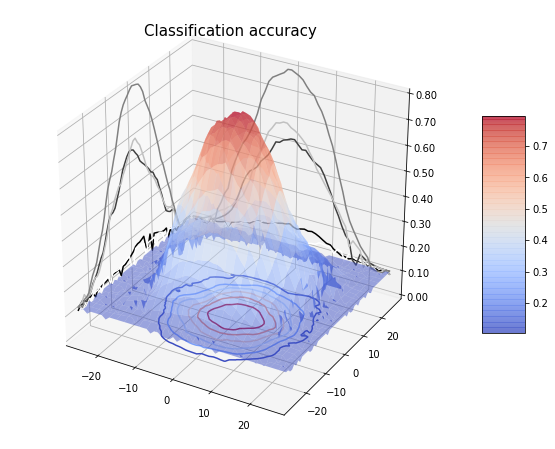

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,8))
for i in range(55):
    for j in range(55):
        acc_map[i,j] = max(acc_map[i,j], 0.1)

ax = fig.add_subplot(111, projection='3d')

X = np.arange(-27, 28)
Y = np.arange(-27, 28)
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, acc_map, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=0.5)

#ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, acc_map, [0.2, 0.3, 0.4, 0.5, 0.6, 0.7], zdir='z', offset=0, cmap=cm.coolwarm, alpha = 1)
cset = ax.contour(X, Y, acc_map, [-20, -10, 0, 10, 20], zdir='x', offset=-27.5, cmap = 'gray')
cset = ax.contour(X, Y, acc_map,  [-20, -10, 0, 10, 20], zdir='y', offset=27.5, cmap = 'gray')


# Customize the z axis.
ax.set_xlim(-27.5, 27.5)
ax.set_zlim(-27.5, 27.5)
ax.set_zlim(0, 0.8)
ax.zaxis.set_major_locator(LinearLocator(9))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title('Classification accuracy', size=15)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, ticks=[0.2,0.3,0.4,0.5,0.6,0.7,0.8])

figname = '../figures/what_map'
fig.savefig(figname + '.png', bbox_inches='tight', pad_inches=0.1)
